# PCA and Clustering

In [1]:
import numpy as np
import pandas as pd
pd.pandas.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

#### Loading the preprocessed 2022 and 2023 data's

In [3]:
dataset_2023 = pd.read_csv('datasets/data_2023_preprocessed.csv')
dataset_2022 = pd.read_csv('datasets/data_2022_preprocessed.csv')

In [4]:
dataset_2023

,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,IIEDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,EDUHIGHCAT,EDUSCHLGO,ENRLCOLLFT2,IRHHSIZ2,IRKI17_2,IRHH65_2,HLCNOTYR,IRMEDICR,IRMCDCHP,IRCHMPUS,HLCALLFG,OTHINS,IRFAMSOC,IIFAMSOC,IRFAMSSI,IRFSTAMP,IRFAMPMT,IRFAMSVC,IIWELMOS,IRPINC3,IIPINC3,IRFAMIN3,IIFAMIN3,BOOKED,DRVINALCO,DRVINMARJ,DRVINCOCN,DRVINHERN,DRVINHALL,DRVININHL,DRVINMETH,CIGEVER,CIG30USE,NICVAPEVER,NICVAPAGE,NICVAP30N,SMKLSSEVR,SMKLSSTRY,SMKLSS30N,SMKLSS30E,CIGAREVR,CIGARTRY,CGR30USE,CI30EST,PIPEVER,PIPE30DY,IRPMNICDEP,IIPMNICDEP,ALCEVER,ALCTRY,ALTOTFG,ALFQFLG,ALCDAYS,ALDYSFG,CADRKDRUG,CADRKMARJ,CABINGFLG,EIBINGAGE,EIBINGYFU,EIBINGMFU,CBDHMPEVR,CBDHMPREC,MJEVER,MJAGE,MRTOTFG,MJFQFLG,MJDAY30A,MEDMJPA2,MKMBGHTREC,BLNTEVER,BLNTAGE,BLRECFL2,BLNT30DY,BLNTNOMJ,COCEVER,COCAGE,CCTOTFG,CCFQFLG,CCDAYPYR,CCDAYPMO,CCDAYPWK,COCUS30A,CC30EST,CRKAGE,CRKYFU,CRKMFU,CRKYRTOT,CRTOTFG,CRFQFLG,CRDAYPYR,CRDAYPMO,CRDAYPWK,CRKUS30A,CR30EST,HEREVER,HERAGE,HERYFU,HERMFU,HRTOTFG,HRFQFLG,HRDAYPYR,HRDAYPMO,HRDAYPWK,HER30USE,HR30EST,LSD,HALTOTFG,HALFQFLG,HALLDYPMO,HALLDYPWK,HALLUC30N,HALLUC30E,LSDAGE,LSDYFU,PCPAGE,PCPYFU,ECSTMOAGE,ECSTMOYFU,KETMINREC,DAMTFXREC,SALVIAREC,AMYLNIT,INHALOT1,INHALOT2,INHALOT3,INHALOT4,INHALOT5,INHALYFU,INHTOTFG,INHFQFLG,INHDYSYR,INHDYPMO,INHDYPWK,INHAL30N,INHAL30ES,METHAMEVR,METHAMAGE,METHAMYFU,METHAMMFU,METOTFG,MEFQFLG,METHDYSYR,METHDYPMO,METHDYPWK,METHAM30N,METHAM30E,OXCNANYYR,PNRANYLIF,PNRANYREC,OXCNNMYR,OXCNNMAGE,OXCNNMYFU,PNRNMREC,PNRNMINIT,PNRNMAGE,PNRNM30FQ,PNRNM30ES,PNRNM30AL,PNRRSOTRS2,PNRRSMAIN,PNRNORXFG,TRQANYLIF,TRQANYREC,TRQNMREC,TRQNMINIT,TRQNMAGE,TRQNM30FQ,TRQNM30ES,TRQNM30AL,TRQRSOTRS2,TRQRSMAIN,TRQNORXFG,STMANYLIF,STMANYREC,STMNMREC,STMNMINIT,STMNMAGE,STMNM30FQ,STMNM30ES,STMNDLREC,STMRSOTRS2,STMRSMAIN,STMNORXFG,SEDANYLIF,SEDANYREC,SEDNMREC,SEDNMINIT,SEDNMAGE,SEDNM30FQ,SEDNM30ES,SEDNM30AL,SEDRSOTRS2,SEDRSMAIN,SEDNORXFG,IICIGRC,IICGRRC,IINICVAPREC,IISMKLSSREC,IIALCRC,IIMJRC,IICOCRC,IICRKRC,IIHALLUCREC,IILSDRC,IIPCPRC,IIECSTMOREC,IIKETMINREC,IIDAMTFXREC,IISALVIAREC,IIINHALREC,IIMETHAMREC,IIPNRANYREC,IROXCNANYYR,IIOXCNANYYR,IRFENTANYYR,IIFENTANYYR,IRBZOANYYR,IIBZOANYYR,IIPNRNMREC,IIOXCNNMYR,IRFENTNMYR,IIFENTNMYR,IITRQNMREC,IISTMNMREC,IISEDNMREC,IICRKFM,IIHERFM,IIINHAL30N,IIPNRNM30FQ,IITRQNM30FQ,IISTMNM30FQ,IIPNRNMINIT,IITRQNMINIT,IISTMNMINIT,IIPNRNMYFU,IITRQNMYFU,IISTMNMYFU,CIGYR,CGRYR,PIPMON,SMKLSSYR,TOBYR,TOBMON,NICVAPYR,TOBVNICYR,TOBVNICMON,TOBCIGVAP2,CBDHMPYR,CBDHMPMON,MJSMKYR,MJVAPYR,MJDABYR,MJEATYR,MJMTHYR,MJSKNYR,MJPLLYR,MJOTHYR,MJCMOTHYR,MJSMKMON,MJVAPMON,MJDABMON,MJEATMON,MJMTHMON,MJSKNMON,MJPLLMON,MJCMOTHMON,LSDYR,LSDMON,PCPYR,PCPMON,ECSTMOYR,ECSTMOMON,DAMTFXYR,DAMTFXMON,KETMINYR,KETMINMON,SALVIAYR,SALVIAMON,PNRANYYR,TRQANYYR,STMANYYR,SEDANYYR,PSYANYYR,PSYCHFLAG,PSYCHYR,PSYCHMON,CNSNMYR,CNSNMMON,MJONLYFLAG,MJONLYYR,ILLEMFLAG,ILLEMYR,ILLEMMON,DCIGMON,CDCGMO,CDNOCGMO,BNGDRKMON,HVYDRKMON,ILTOBALCYR,ILTOBALCMN,RXBZOSMIS,ALCYDAYS,MRJYDAYS,FUCIG18,FUCD218,FUCD221,FUCGR18,FUCGR21,FUSMKLSS18,FUNICVAP18,FUNICVAP21,FUALC18,FUALC21,FUMJ18,FUMJ21,FUCOC18,FUCOC21,FUCRK18,FUCRK21,FUHER18,FUHER21,FUHALLUC18,FUHALLUC21,FULSD18,FULSD21,FUPCP18,FUPCP21,FUECSTMO18,FUECSTMO21,FUINHAL18,FUMETHAM18,FUMETHAM21,FUPNRNM18,FUTRQNM18,FUTRQNM21,FUSTMNM18,FUSTMNM21,FUSEDNM18,COLDMEDS,COLDREC,COLDYR1,COLDYR2,COLDYR3,COLDYR4,COLDYR5,OTCFLAG,GHB,GHBREC,CONDLREC,HRSMKREC,HRSNFREC,HEOTSMK,HEOTSP,HRNDLREC,METHNDLRC,OTDGNDLRC,IINPCOLDREC,NPCOLDYR,NPCOLDMON,GHBYR,GHBMON,UDALTIMEUSE,UDMJTIMEGET,UDMJWSHSTOP,UDCCNOTSTOP,UDCCWSHSTOP,UDCCHLTHCTD,UDCCMNTLCTD,UDCCFMLYCTD,UDCCWDTIRED,UDCCAVWCOCN,UDHETIMEGET,UDHELESSEFF,UDHENOTSTOP,UDHEWSHSTOP,UDHEHLTHCTD,UDHEMNTLPRB,UDHEMNTLCTD,UDHEFMLYCTD,UDHEAVWHERN,UDHANOTSTOP,UDHAHLTHCTD,UDHAMNTLCTD,UDHAFMLYCTD,UDINNOTSTOP,UDINHLTHCTD,UDINMNTLCTD,UDINFMLYCTD,UDMETIMEGET,UDMESTRURGE,UDMELESSEFF,UDMENOTSTOP,UDMEWSHSTOP,UDMEHLTHCTD,UDMEMNTLCTD,UDMEFMLYCTD,UDMEWDTIRED,UDMEAVWMETH,UDTRNOTSTOP,UDTRHLTHCTD,UDTRMNTLCTD,UDTRFMLYCTD,UDTRAVWSVTR,UDSTNOTSTOP,UDSTHLTHCTD,UDSTMNTLCTD,UDSTFMLYCTD,UDSTWDTIRED,UDSTAVWSTIM,UDS

In [5]:
# double checking again low variance features
# applying VarianceThreshold to filter low-variance features (threshold=0.8)
selector = VarianceThreshold(threshold=0.01)
selector.fit(dataset_2023)

# get boolean mask of retained features
selected_features_mask = selector.get_support()

# get the names of low-variance features
low_variance_features = (dataset_2023.columns[~selected_features_mask]).tolist()
print(low_variance_features)

['IIEDUHIGHST2', 'EIBINGAGE', 'EIBINGYFU', 'EIBINGMFU', 'HRFQFLG', 'IICOCRC', 'IICRKRC', 'IILSDRC', 'IIPCPRC', 'IIECSTMOREC', 'IIKETMINREC', 'IIDAMTFXREC', 'IISALVIAREC', 'IIMETHAMREC', 'IRFENTANYYR', 'IIOXCNNMYR', 'IRFENTNMYR', 'IIFENTNMYR', 'PIPMON', 'MJPLLYR', 'MJOTHYR', 'MJMTHMON', 'MJSKNMON', 'MJPLLMON', 'LSDYR', 'LSDMON', 'PCPYR', 'PCPMON', 'ECSTMOYR', 'ECSTMOMON', 'DAMTFXYR', 'DAMTFXMON', 'KETMINYR', 'KETMINMON', 'SALVIAYR', 'SALVIAMON', 'RXBZOSMIS', 'FUCRK18', 'FUHER18', 'FUHER21', 'FUPCP18', 'FUPCP21', 'FUPNRNM18', 'FUTRQNM18', 'FUTRQNM21', 'FUSTMNM18', 'FUSTMNM21', 'FUSEDNM18', 'NPCOLDYR', 'NPCOLDMON', 'GHBYR', 'GHBMON', 'IRPYUD5COC', 'IRPYUD5HER', 'IRPYUD5HAL', 'IRPYUD5INH', 'IRPYUD5MTH', 'IRUD5PNRMIS', 'IRUD5PNRUNM', 'IRUD5TRQMIS', 'IRUD5TRQUNM', 'IRUD5STMMIS', 'IRUD5STMUNM', 'IRUD5SEDMIS', 'IRUD5SEDUNM', 'UD5TRQSDANY', 'UDYR5STMANY', 'IRSUTERED', 'IRSUTINHOSP', 'IRSUTINRHAB', 'IRSUTINRSMH', 'IRSUTINOPL', 'IRSUTOUTRHAB', 'IRSUTOUTHOSP', 'IRSUTOUTSCHL', 'IRSUTOUTOPL', 'IRSUT

In [6]:
print(len(low_variance_features))

108


In [7]:
# after removing the low variance features after double checking

dataset_2022_remv_low_var = dataset_2022.drop(low_variance_features, axis=1)
dataset_2023_remv_low_var = dataset_2023.drop(low_variance_features, axis=1)
dataset_2023_remv_low_var

,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,EDUHIGHCAT,EDUSCHLGO,ENRLCOLLFT2,IRHHSIZ2,IRKI17_2,IRHH65_2,HLCNOTYR,IRMEDICR,IRMCDCHP,IRCHMPUS,HLCALLFG,OTHINS,IRFAMSOC,IIFAMSOC,IRFAMSSI,IRFSTAMP,IRFAMPMT,IRFAMSVC,IIWELMOS,IRPINC3,IIPINC3,IRFAMIN3,IIFAMIN3,BOOKED,DRVINALCO,DRVINMARJ,DRVINCOCN,DRVINHERN,DRVINHALL,DRVININHL,DRVINMETH,CIGEVER,CIG30USE,NICVAPEVER,NICVAPAGE,NICVAP30N,SMKLSSEVR,SMKLSSTRY,SMKLSS30N,SMKLSS30E,CIGAREVR,CIGARTRY,CGR30USE,CI30EST,PIPEVER,PIPE30DY,IRPMNICDEP,IIPMNICDEP,ALCEVER,ALCTRY,ALTOTFG,ALFQFLG,ALCDAYS,ALDYSFG,CADRKDRUG,CADRKMARJ,CABINGFLG,CBDHMPEVR,CBDHMPREC,MJEVER,MJAGE,MRTOTFG,MJFQFLG,MJDAY30A,MEDMJPA2,MKMBGHTREC,BLNTEVER,BLNTAGE,BLRECFL2,BLNT30DY,BLNTNOMJ,COCEVER,COCAGE,CCTOTFG,CCFQFLG,CCDAYPYR,CCDAYPMO,CCDAYPWK,COCUS30A,CC30EST,CRKAGE,CRKYFU,CRKMFU,CRKYRTOT,CRTOTFG,CRFQFLG,CRDAYPYR,CRDAYPMO,CRDAYPWK,CRKUS30A,CR30EST,HEREVER,HERAGE,HERYFU,HERMFU,HRTOTFG,HRDAYPYR,HRDAYPMO,HRDAYPWK,HER30USE,HR30EST,LSD,HALTOTFG,HALFQFLG,HALLDYPMO,HALLDYPWK,HALLUC30N,HALLUC30E,LSDAGE,LSDYFU,PCPAGE,PCPYFU,ECSTMOAGE,ECSTMOYFU,KETMINREC,DAMTFXREC,SALVIAREC,AMYLNIT,INHALOT1,INHALOT2,INHALOT3,INHALOT4,INHALOT5,INHALYFU,INHTOTFG,INHFQFLG,INHDYSYR,INHDYPMO,INHDYPWK,INHAL30N,INHAL30ES,METHAMEVR,METHAMAGE,METHAMYFU,METHAMMFU,METOTFG,MEFQFLG,METHDYSYR,METHDYPMO,METHDYPWK,METHAM30N,METHAM30E,OXCNANYYR,PNRANYLIF,PNRANYREC,OXCNNMYR,OXCNNMAGE,OXCNNMYFU,PNRNMREC,PNRNMINIT,PNRNMAGE,PNRNM30FQ,PNRNM30ES,PNRNM30AL,PNRRSOTRS2,PNRRSMAIN,PNRNORXFG,TRQANYLIF,TRQANYREC,TRQNMREC,TRQNMINIT,TRQNMAGE,TRQNM30FQ,TRQNM30ES,TRQNM30AL,TRQRSOTRS2,TRQRSMAIN,TRQNORXFG,STMANYLIF,STMANYREC,STMNMREC,STMNMINIT,STMNMAGE,STMNM30FQ,STMNM30ES,STMNDLREC,STMRSOTRS2,STMRSMAIN,STMNORXFG,SEDANYLIF,SEDANYREC,SEDNMREC,SEDNMINIT,SEDNMAGE,SEDNM30FQ,SEDNM30ES,SEDNM30AL,SEDRSOTRS2,SEDRSMAIN,SEDNORXFG,IICIGRC,IICGRRC,IINICVAPREC,IISMKLSSREC,IIALCRC,IIMJRC,IIHALLUCREC,IIINHALREC,IIPNRANYREC,IROXCNANYYR,IIOXCNANYYR,IIFENTANYYR,IRBZOANYYR,IIBZOANYYR,IIPNRNMREC,IITRQNMREC,IISTMNMREC,IISEDNMREC,IICRKFM,IIHERFM,IIINHAL30N,IIPNRNM30FQ,IITRQNM30FQ,IISTMNM30FQ,IIPNRNMINIT,IITRQNMINIT,IISTMNMINIT,IIPNRNMYFU,IITRQNMYFU,IISTMNMYFU,CIGYR,CGRYR,SMKLSSYR,TOBYR,TOBMON,NICVAPYR,TOBVNICYR,TOBVNICMON,TOBCIGVAP2,CBDHMPYR,CBDHMPMON,MJSMKYR,MJVAPYR,MJDABYR,MJEATYR,MJMTHYR,MJSKNYR,MJCMOTHYR,MJSMKMON,MJVAPMON,MJDABMON,MJEATMON,MJCMOTHMON,PNRANYYR,TRQANYYR,STMANYYR,SEDANYYR,PSYANYYR,PSYCHFLAG,PSYCHYR,PSYCHMON,CNSNMYR,CNSNMMON,MJONLYFLAG,MJONLYYR,ILLEMFLAG,ILLEMYR,ILLEMMON,DCIGMON,CDCGMO,CDNOCGMO,BNGDRKMON,HVYDRKMON,ILTOBALCYR,ILTOBALCMN,ALCYDAYS,MRJYDAYS,FUCIG18,FUCD218,FUCD221,FUCGR18,FUCGR21,FUSMKLSS18,FUNICVAP18,FUNICVAP21,FUALC18,FUALC21,FUMJ18,FUMJ21,FUCOC18,FUCOC21,FUCRK21,FUHALLUC18,FUHALLUC21,FULSD18,FULSD21,FUECSTMO18,FUECSTMO21,FUINHAL18,FUMETHAM18,FUMETHAM21,COLDMEDS,COLDREC,COLDYR1,COLDYR2,COLDYR3,COLDYR4,COLDYR5,OTCFLAG,GHB,GHBREC,CONDLREC,HRSMKREC,HRSNFREC,HEOTSMK,HEOTSP,HRNDLREC,METHNDLRC,OTDGNDLRC,IINPCOLDREC,UDALTIMEUSE,UDMJTIMEGET,UDMJWSHSTOP,UDCCNOTSTOP,UDCCWSHSTOP,UDCCHLTHCTD,UDCCMNTLCTD,UDCCFMLYCTD,UDCCWDTIRED,UDCCAVWCOCN,UDHETIMEGET,UDHELESSEFF,UDHENOTSTOP,UDHEWSHSTOP,UDHEHLTHCTD,UDHEMNTLPRB,UDHEMNTLCTD,UDHEFMLYCTD,UDHEAVWHERN,UDHANOTSTOP,UDHAHLTHCTD,UDHAMNTLCTD,UDHAFMLYCTD,UDINNOTSTOP,UDINHLTHCTD,UDINMNTLCTD,UDINFMLYCTD,UDMETIMEGET,UDMESTRURGE,UDMELESSEFF,UDMENOTSTOP,UDMEWSHSTOP,UDMEHLTHCTD,UDMEMNTLCTD,UDMEFMLYCTD,UDMEWDTIRED,UDMEAVWMETH,UDTRNOTSTOP,UDTRHLTHCTD,UDTRMNTLCTD,UDTRFMLYCTD,UDTRAVWSVTR,UDSTNOTSTOP,UDSTHLTHCTD,UDSTMNTLCTD,UDSTFMLYCTD,UDSTWDTIRED,UDSTAVWSTIM,UDSVNOTSTOP,UDSVHLTHCTD,UDSVMNTLCTD,UDSVFMLYCTD,UDSVAVWSVTR,IRPYUD5ALC,IRPYUD5MRJ,UD5PSYANY,UD5OPIANY,UD5CNSANY,UD5ILALANY,UD5ILAALANY,UD5ILNALANY,UD5ALNILANY,SMKAGLAST,SMKYRLAST,CGRAGLST,COCYLU,CRKYLU,HERYLU,LSDYLU,PCPYLU,PCPMLU,ECSTMOYLU,INHLYRLST,METHYRLST,SUTOUTINHL,SUTOUTHER,SUTOUTMETH,SUTOUTSED,IISUTSUPPGRP,IRSUTOUTMHCR,IRSUTOUTTHRP,IRSUTOUTDOC,IRSUTPHVID,IISUTDETOX,SUTINPPY,SUTOUTNDOC,SUTOUTDRGPY,SUTOUTUNSPPY,SUTRTPY,SUTRTDRGPY,SUTRTALCPY,SUTRTUNSPPY,RSKCIGPKD,RSKMRJMON,RSK

In [19]:
# removing DON'T KNOW, BLANK (not answered and not asked questions)
# the standard code based on the codebook
refused_answers = [97, 997, 9997]
blank_answers = [99, 999, 9999 ] 
dont_know_answers = [ 94, 994, 9994]

# function to rem
def remove_unwanted_answers(data, answers):
    """
    remove rows from a data where any column contains values from the answers list.
    """
    # creat a mask to identify unwanted answers
    mask = data.isin(answers).any(axis=1)
    # Invert the mask to keep rows without refused answers
    data_filtered = data[~mask]
    print(f"Removed {len(data) - len(data_filtered)} rows containing unnecessary answers.")
    return data_filtered.reset_index(drop=True)

def remove_columns_with_refused_answers(data, refused_answers, threshold):
    """
    remove columns from a dataFrame where more than a specified percentage of values are (refused_answers).
    """
    # cal. the percentage of refused answers in each column
    refused_percentage = data.isin(refused_answers).mean()
    columns_to_drop = refused_percentage[refused_percentage > threshold].index
    data_filtered = data.drop(columns=columns_to_drop)
    print(f"Removed {len(columns_to_drop)} columns with more than {threshold * 100}% blank answers.")
    return data_filtered

In [22]:
# data_filtered_2023 = remove_columns_with_refused_answers(dataset_2022_remv_low_var, blank_answers, 0.09)
# data_filtered_2023 

In [ ]:
# so removing the rows for blank answer,dont_know_answers doesn't show reliable performance when clustering bas
data_filtered_2023 = remove_columns_with_refused_answers(dataset_2022_remv_low_var )



#### Scaling(Normalizing)- Centering the data

In [8]:
# scaling the data 

def standardscaling(data):
    original_data = data.copy()
    # numerical_data = data.select_dtypes(include=['float64', 'int64'])  # all data are numerical at the moment
    scaler = StandardScaler()
    scaled_numerical_data = scaler.fit_transform(data)
    scaled_data = pd.DataFrame(scaled_numerical_data, columns=original_data.columns)
    return scaled_data

In [9]:
scaled_data_2022 = standardscaling(dataset_2022_remv_low_var)
scaled_data_2023 = standardscaling (dataset_2023_remv_low_var)
scaled_data_2023

,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,EDUHIGHCAT,EDUSCHLGO,ENRLCOLLFT2,IRHHSIZ2,IRKI17_2,IRHH65_2,HLCNOTYR,IRMEDICR,IRMCDCHP,IRCHMPUS,HLCALLFG,OTHINS,IRFAMSOC,IIFAMSOC,IRFAMSSI,IRFSTAMP,IRFAMPMT,IRFAMSVC,IIWELMOS,IRPINC3,IIPINC3,IRFAMIN3,IIFAMIN3,BOOKED,DRVINALCO,DRVINMARJ,DRVINCOCN,DRVINHERN,DRVINHALL,DRVININHL,DRVINMETH,CIGEVER,CIG30USE,NICVAPEVER,NICVAPAGE,NICVAP30N,SMKLSSEVR,SMKLSSTRY,SMKLSS30N,SMKLSS30E,CIGAREVR,CIGARTRY,CGR30USE,CI30EST,PIPEVER,PIPE30DY,IRPMNICDEP,IIPMNICDEP,ALCEVER,ALCTRY,ALTOTFG,ALFQFLG,ALCDAYS,ALDYSFG,CADRKDRUG,CADRKMARJ,CABINGFLG,CBDHMPEVR,CBDHMPREC,MJEVER,MJAGE,MRTOTFG,MJFQFLG,MJDAY30A,MEDMJPA2,MKMBGHTREC,BLNTEVER,BLNTAGE,BLRECFL2,BLNT30DY,BLNTNOMJ,COCEVER,COCAGE,CCTOTFG,CCFQFLG,CCDAYPYR,CCDAYPMO,CCDAYPWK,COCUS30A,CC30EST,CRKAGE,CRKYFU,CRKMFU,CRKYRTOT,CRTOTFG,CRFQFLG,CRDAYPYR,CRDAYPMO,CRDAYPWK,CRKUS30A,CR30EST,HEREVER,HERAGE,HERYFU,HERMFU,HRTOTFG,HRDAYPYR,HRDAYPMO,HRDAYPWK,HER30USE,HR30EST,LSD,HALTOTFG,HALFQFLG,HALLDYPMO,HALLDYPWK,HALLUC30N,HALLUC30E,LSDAGE,LSDYFU,PCPAGE,PCPYFU,ECSTMOAGE,ECSTMOYFU,KETMINREC,DAMTFXREC,SALVIAREC,AMYLNIT,INHALOT1,INHALOT2,INHALOT3,INHALOT4,INHALOT5,INHALYFU,INHTOTFG,INHFQFLG,INHDYSYR,INHDYPMO,INHDYPWK,INHAL30N,INHAL30ES,METHAMEVR,METHAMAGE,METHAMYFU,METHAMMFU,METOTFG,MEFQFLG,METHDYSYR,METHDYPMO,METHDYPWK,METHAM30N,METHAM30E,OXCNANYYR,PNRANYLIF,PNRANYREC,OXCNNMYR,OXCNNMAGE,OXCNNMYFU,PNRNMREC,PNRNMINIT,PNRNMAGE,PNRNM30FQ,PNRNM30ES,PNRNM30AL,PNRRSOTRS2,PNRRSMAIN,PNRNORXFG,TRQANYLIF,TRQANYREC,TRQNMREC,TRQNMINIT,TRQNMAGE,TRQNM30FQ,TRQNM30ES,TRQNM30AL,TRQRSOTRS2,TRQRSMAIN,TRQNORXFG,STMANYLIF,STMANYREC,STMNMREC,STMNMINIT,STMNMAGE,STMNM30FQ,STMNM30ES,STMNDLREC,STMRSOTRS2,STMRSMAIN,STMNORXFG,SEDANYLIF,SEDANYREC,SEDNMREC,SEDNMINIT,SEDNMAGE,SEDNM30FQ,SEDNM30ES,SEDNM30AL,SEDRSOTRS2,SEDRSMAIN,SEDNORXFG,IICIGRC,IICGRRC,IINICVAPREC,IISMKLSSREC,IIALCRC,IIMJRC,IIHALLUCREC,IIINHALREC,IIPNRANYREC,IROXCNANYYR,IIOXCNANYYR,IIFENTANYYR,IRBZOANYYR,IIBZOANYYR,IIPNRNMREC,IITRQNMREC,IISTMNMREC,IISEDNMREC,IICRKFM,IIHERFM,IIINHAL30N,IIPNRNM30FQ,IITRQNM30FQ,IISTMNM30FQ,IIPNRNMINIT,IITRQNMINIT,IISTMNMINIT,IIPNRNMYFU,IITRQNMYFU,IISTMNMYFU,CIGYR,CGRYR,SMKLSSYR,TOBYR,TOBMON,NICVAPYR,TOBVNICYR,TOBVNICMON,TOBCIGVAP2,CBDHMPYR,CBDHMPMON,MJSMKYR,MJVAPYR,MJDABYR,MJEATYR,MJMTHYR,MJSKNYR,MJCMOTHYR,MJSMKMON,MJVAPMON,MJDABMON,MJEATMON,MJCMOTHMON,PNRANYYR,TRQANYYR,STMANYYR,SEDANYYR,PSYANYYR,PSYCHFLAG,PSYCHYR,PSYCHMON,CNSNMYR,CNSNMMON,MJONLYFLAG,MJONLYYR,ILLEMFLAG,ILLEMYR,ILLEMMON,DCIGMON,CDCGMO,CDNOCGMO,BNGDRKMON,HVYDRKMON,ILTOBALCYR,ILTOBALCMN,ALCYDAYS,MRJYDAYS,FUCIG18,FUCD218,FUCD221,FUCGR18,FUCGR21,FUSMKLSS18,FUNICVAP18,FUNICVAP21,FUALC18,FUALC21,FUMJ18,FUMJ21,FUCOC18,FUCOC21,FUCRK21,FUHALLUC18,FUHALLUC21,FULSD18,FULSD21,FUECSTMO18,FUECSTMO21,FUINHAL18,FUMETHAM18,FUMETHAM21,COLDMEDS,COLDREC,COLDYR1,COLDYR2,COLDYR3,COLDYR4,COLDYR5,OTCFLAG,GHB,GHBREC,CONDLREC,HRSMKREC,HRSNFREC,HEOTSMK,HEOTSP,HRNDLREC,METHNDLRC,OTDGNDLRC,IINPCOLDREC,UDALTIMEUSE,UDMJTIMEGET,UDMJWSHSTOP,UDCCNOTSTOP,UDCCWSHSTOP,UDCCHLTHCTD,UDCCMNTLCTD,UDCCFMLYCTD,UDCCWDTIRED,UDCCAVWCOCN,UDHETIMEGET,UDHELESSEFF,UDHENOTSTOP,UDHEWSHSTOP,UDHEHLTHCTD,UDHEMNTLPRB,UDHEMNTLCTD,UDHEFMLYCTD,UDHEAVWHERN,UDHANOTSTOP,UDHAHLTHCTD,UDHAMNTLCTD,UDHAFMLYCTD,UDINNOTSTOP,UDINHLTHCTD,UDINMNTLCTD,UDINFMLYCTD,UDMETIMEGET,UDMESTRURGE,UDMELESSEFF,UDMENOTSTOP,UDMEWSHSTOP,UDMEHLTHCTD,UDMEMNTLCTD,UDMEFMLYCTD,UDMEWDTIRED,UDMEAVWMETH,UDTRNOTSTOP,UDTRHLTHCTD,UDTRMNTLCTD,UDTRFMLYCTD,UDTRAVWSVTR,UDSTNOTSTOP,UDSTHLTHCTD,UDSTMNTLCTD,UDSTFMLYCTD,UDSTWDTIRED,UDSTAVWSTIM,UDSVNOTSTOP,UDSVHLTHCTD,UDSVMNTLCTD,UDSVFMLYCTD,UDSVAVWSVTR,IRPYUD5ALC,IRPYUD5MRJ,UD5PSYANY,UD5OPIANY,UD5CNSANY,UD5ILALANY,UD5ILAALANY,UD5ILNALANY,UD5ALNILANY,SMKAGLAST,SMKYRLAST,CGRAGLST,COCYLU,CRKYLU,HERYLU,LSDYLU,PCPYLU,PCPMLU,ECSTMOYLU,INHLYRLST,METHYRLST,SUTOUTINHL,SUTOUTHER,SUTOUTMETH,SUTOUTSED,IISUTSUPPGRP,IRSUTOUTMHCR,IRSUTOUTTHRP,IRSUTOUTDOC,IRSUTPHVID,IISUTDETOX,SUTINPPY,SUTOUTNDOC,SUTOUTDRGPY,SUTOUTUNSPPY,SUTRTPY,SUTRTDRGPY,SUTRTALCPY,SUTRTUNSPPY,RSKCIGPKD,RSKMRJMON,RSK

### Outlier Removal

In [146]:
scaled_data_2023

,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,EDUHIGHCAT,EDUSCHLGO,ENRLCOLLFT2,IRHHSIZ2,IRKI17_2,IRHH65_2,HLCNOTYR,IRMEDICR,IRMCDCHP,IRCHMPUS,HLCALLFG,OTHINS,IRFAMSOC,IIFAMSOC,IRFAMSSI,IRFSTAMP,IRFAMPMT,IRFAMSVC,IIWELMOS,IRPINC3,IIPINC3,IRFAMIN3,IIFAMIN3,BOOKED,DRVINALCO,DRVINMARJ,DRVINCOCN,DRVINHERN,DRVINHALL,DRVININHL,DRVINMETH,CIGEVER,CIG30USE,NICVAPEVER,NICVAPAGE,NICVAP30N,SMKLSSEVR,SMKLSSTRY,SMKLSS30N,SMKLSS30E,CIGAREVR,CIGARTRY,CGR30USE,CI30EST,PIPEVER,PIPE30DY,IRPMNICDEP,IIPMNICDEP,ALCEVER,ALCTRY,ALTOTFG,ALFQFLG,ALCDAYS,ALDYSFG,CADRKDRUG,CADRKMARJ,CABINGFLG,CBDHMPEVR,CBDHMPREC,MJEVER,MJAGE,MRTOTFG,MJFQFLG,MJDAY30A,MEDMJPA2,MKMBGHTREC,BLNTEVER,BLNTAGE,BLRECFL2,BLNT30DY,BLNTNOMJ,COCEVER,COCAGE,CCTOTFG,CCFQFLG,CCDAYPYR,CCDAYPMO,CCDAYPWK,COCUS30A,CC30EST,CRKAGE,CRKYFU,CRKMFU,CRKYRTOT,CRTOTFG,CRFQFLG,CRDAYPYR,CRDAYPMO,CRDAYPWK,CRKUS30A,CR30EST,HEREVER,HERAGE,HERYFU,HERMFU,HRTOTFG,HRDAYPYR,HRDAYPMO,HRDAYPWK,HER30USE,HR30EST,LSD,HALTOTFG,HALFQFLG,HALLDYPMO,HALLDYPWK,HALLUC30N,HALLUC30E,LSDAGE,LSDYFU,PCPAGE,PCPYFU,ECSTMOAGE,ECSTMOYFU,KETMINREC,DAMTFXREC,SALVIAREC,AMYLNIT,INHALOT1,INHALOT2,INHALOT3,INHALOT4,INHALOT5,INHALYFU,INHTOTFG,INHFQFLG,INHDYSYR,INHDYPMO,INHDYPWK,INHAL30N,INHAL30ES,METHAMEVR,METHAMAGE,METHAMYFU,METHAMMFU,METOTFG,MEFQFLG,METHDYSYR,METHDYPMO,METHDYPWK,METHAM30N,METHAM30E,OXCNANYYR,PNRANYLIF,PNRANYREC,OXCNNMYR,OXCNNMAGE,OXCNNMYFU,PNRNMREC,PNRNMINIT,PNRNMAGE,PNRNM30FQ,PNRNM30ES,PNRNM30AL,PNRRSOTRS2,PNRRSMAIN,PNRNORXFG,TRQANYLIF,TRQANYREC,TRQNMREC,TRQNMINIT,TRQNMAGE,TRQNM30FQ,TRQNM30ES,TRQNM30AL,TRQRSOTRS2,TRQRSMAIN,TRQNORXFG,STMANYLIF,STMANYREC,STMNMREC,STMNMINIT,STMNMAGE,STMNM30FQ,STMNM30ES,STMNDLREC,STMRSOTRS2,STMRSMAIN,STMNORXFG,SEDANYLIF,SEDANYREC,SEDNMREC,SEDNMINIT,SEDNMAGE,SEDNM30FQ,SEDNM30ES,SEDNM30AL,SEDRSOTRS2,SEDRSMAIN,SEDNORXFG,IICIGRC,IICGRRC,IINICVAPREC,IISMKLSSREC,IIALCRC,IIMJRC,IIHALLUCREC,IIINHALREC,IIPNRANYREC,IROXCNANYYR,IIOXCNANYYR,IIFENTANYYR,IRBZOANYYR,IIBZOANYYR,IIPNRNMREC,IITRQNMREC,IISTMNMREC,IISEDNMREC,IICRKFM,IIHERFM,IIINHAL30N,IIPNRNM30FQ,IITRQNM30FQ,IISTMNM30FQ,IIPNRNMINIT,IITRQNMINIT,IISTMNMINIT,IIPNRNMYFU,IITRQNMYFU,IISTMNMYFU,CIGYR,CGRYR,SMKLSSYR,TOBYR,TOBMON,NICVAPYR,TOBVNICYR,TOBVNICMON,TOBCIGVAP2,CBDHMPYR,CBDHMPMON,MJSMKYR,MJVAPYR,MJDABYR,MJEATYR,MJMTHYR,MJSKNYR,MJCMOTHYR,MJSMKMON,MJVAPMON,MJDABMON,MJEATMON,MJCMOTHMON,PNRANYYR,TRQANYYR,STMANYYR,SEDANYYR,PSYANYYR,PSYCHFLAG,PSYCHYR,PSYCHMON,CNSNMYR,CNSNMMON,MJONLYFLAG,MJONLYYR,ILLEMFLAG,ILLEMYR,ILLEMMON,DCIGMON,CDCGMO,CDNOCGMO,BNGDRKMON,HVYDRKMON,ILTOBALCYR,ILTOBALCMN,ALCYDAYS,MRJYDAYS,FUCIG18,FUCD218,FUCD221,FUCGR18,FUCGR21,FUSMKLSS18,FUNICVAP18,FUNICVAP21,FUALC18,FUALC21,FUMJ18,FUMJ21,FUCOC18,FUCOC21,FUCRK21,FUHALLUC18,FUHALLUC21,FULSD18,FULSD21,FUECSTMO18,FUECSTMO21,FUINHAL18,FUMETHAM18,FUMETHAM21,COLDMEDS,COLDREC,COLDYR1,COLDYR2,COLDYR3,COLDYR4,COLDYR5,OTCFLAG,GHB,GHBREC,CONDLREC,HRSMKREC,HRSNFREC,HEOTSMK,HEOTSP,HRNDLREC,METHNDLRC,OTDGNDLRC,IINPCOLDREC,UDALTIMEUSE,UDMJTIMEGET,UDMJWSHSTOP,UDCCNOTSTOP,UDCCWSHSTOP,UDCCHLTHCTD,UDCCMNTLCTD,UDCCFMLYCTD,UDCCWDTIRED,UDCCAVWCOCN,UDHETIMEGET,UDHELESSEFF,UDHENOTSTOP,UDHEWSHSTOP,UDHEHLTHCTD,UDHEMNTLPRB,UDHEMNTLCTD,UDHEFMLYCTD,UDHEAVWHERN,UDHANOTSTOP,UDHAHLTHCTD,UDHAMNTLCTD,UDHAFMLYCTD,UDINNOTSTOP,UDINHLTHCTD,UDINMNTLCTD,UDINFMLYCTD,UDMETIMEGET,UDMESTRURGE,UDMELESSEFF,UDMENOTSTOP,UDMEWSHSTOP,UDMEHLTHCTD,UDMEMNTLCTD,UDMEFMLYCTD,UDMEWDTIRED,UDMEAVWMETH,UDTRNOTSTOP,UDTRHLTHCTD,UDTRMNTLCTD,UDTRFMLYCTD,UDTRAVWSVTR,UDSTNOTSTOP,UDSTHLTHCTD,UDSTMNTLCTD,UDSTFMLYCTD,UDSTWDTIRED,UDSTAVWSTIM,UDSVNOTSTOP,UDSVHLTHCTD,UDSVMNTLCTD,UDSVFMLYCTD,UDSVAVWSVTR,IRPYUD5ALC,IRPYUD5MRJ,UD5PSYANY,UD5OPIANY,UD5CNSANY,UD5ILALANY,UD5ILAALANY,UD5ILNALANY,UD5ALNILANY,SMKAGLAST,SMKYRLAST,CGRAGLST,COCYLU,CRKYLU,HERYLU,LSDYLU,PCPYLU,PCPMLU,ECSTMOYLU,INHLYRLST,METHYRLST,SUTOUTINHL,SUTOUTHER,SUTOUTMETH,SUTOUTSED,IISUTSUPPGRP,IRSUTOUTMHCR,IRSUTOUTTHRP,IRSUTOUTDOC,IRSUTPHVID,IISUTDETOX,SUTINPPY,SUTOUTNDOC,SUTOUTDRGPY,SUTOUTUNSPPY,SUTRTPY,SUTRTDRGPY,SUTRTALCPY,SUTRTUNSPPY,RSKCIGPKD,RSKMRJMON,RSK

- For high-dimensional data, algorithmic methods like Isolation Forest or Local Outlier Factor can detect outliers by learning the data’s structure. “One efficient way of performing outlier detection in high-dimensional datasets is to use random forests. The IsolationForest isolates observations by randomly selecting a feature and split value”

In [10]:
# IsolationForest- Outlier Removal
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42) # initially 0.01
outlier_preds = iso.fit_predict(scaled_data_2023)  # -1 for outliers, 1 for inliers
X_inliers = scaled_data_2023[outlier_preds == 1]
X_inliers 

,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,EDUHIGHCAT,EDUSCHLGO,ENRLCOLLFT2,IRHHSIZ2,IRKI17_2,IRHH65_2,HLCNOTYR,IRMEDICR,IRMCDCHP,IRCHMPUS,HLCALLFG,OTHINS,IRFAMSOC,IIFAMSOC,IRFAMSSI,IRFSTAMP,IRFAMPMT,IRFAMSVC,IIWELMOS,IRPINC3,IIPINC3,IRFAMIN3,IIFAMIN3,BOOKED,DRVINALCO,DRVINMARJ,DRVINCOCN,DRVINHERN,DRVINHALL,DRVININHL,DRVINMETH,CIGEVER,CIG30USE,NICVAPEVER,NICVAPAGE,NICVAP30N,SMKLSSEVR,SMKLSSTRY,SMKLSS30N,SMKLSS30E,CIGAREVR,CIGARTRY,CGR30USE,CI30EST,PIPEVER,PIPE30DY,IRPMNICDEP,IIPMNICDEP,ALCEVER,ALCTRY,ALTOTFG,ALFQFLG,ALCDAYS,ALDYSFG,CADRKDRUG,CADRKMARJ,CABINGFLG,CBDHMPEVR,CBDHMPREC,MJEVER,MJAGE,MRTOTFG,MJFQFLG,MJDAY30A,MEDMJPA2,MKMBGHTREC,BLNTEVER,BLNTAGE,BLRECFL2,BLNT30DY,BLNTNOMJ,COCEVER,COCAGE,CCTOTFG,CCFQFLG,CCDAYPYR,CCDAYPMO,CCDAYPWK,COCUS30A,CC30EST,CRKAGE,CRKYFU,CRKMFU,CRKYRTOT,CRTOTFG,CRFQFLG,CRDAYPYR,CRDAYPMO,CRDAYPWK,CRKUS30A,CR30EST,HEREVER,HERAGE,HERYFU,HERMFU,HRTOTFG,HRDAYPYR,HRDAYPMO,HRDAYPWK,HER30USE,HR30EST,LSD,HALTOTFG,HALFQFLG,HALLDYPMO,HALLDYPWK,HALLUC30N,HALLUC30E,LSDAGE,LSDYFU,PCPAGE,PCPYFU,ECSTMOAGE,ECSTMOYFU,KETMINREC,DAMTFXREC,SALVIAREC,AMYLNIT,INHALOT1,INHALOT2,INHALOT3,INHALOT4,INHALOT5,INHALYFU,INHTOTFG,INHFQFLG,INHDYSYR,INHDYPMO,INHDYPWK,INHAL30N,INHAL30ES,METHAMEVR,METHAMAGE,METHAMYFU,METHAMMFU,METOTFG,MEFQFLG,METHDYSYR,METHDYPMO,METHDYPWK,METHAM30N,METHAM30E,OXCNANYYR,PNRANYLIF,PNRANYREC,OXCNNMYR,OXCNNMAGE,OXCNNMYFU,PNRNMREC,PNRNMINIT,PNRNMAGE,PNRNM30FQ,PNRNM30ES,PNRNM30AL,PNRRSOTRS2,PNRRSMAIN,PNRNORXFG,TRQANYLIF,TRQANYREC,TRQNMREC,TRQNMINIT,TRQNMAGE,TRQNM30FQ,TRQNM30ES,TRQNM30AL,TRQRSOTRS2,TRQRSMAIN,TRQNORXFG,STMANYLIF,STMANYREC,STMNMREC,STMNMINIT,STMNMAGE,STMNM30FQ,STMNM30ES,STMNDLREC,STMRSOTRS2,STMRSMAIN,STMNORXFG,SEDANYLIF,SEDANYREC,SEDNMREC,SEDNMINIT,SEDNMAGE,SEDNM30FQ,SEDNM30ES,SEDNM30AL,SEDRSOTRS2,SEDRSMAIN,SEDNORXFG,IICIGRC,IICGRRC,IINICVAPREC,IISMKLSSREC,IIALCRC,IIMJRC,IIHALLUCREC,IIINHALREC,IIPNRANYREC,IROXCNANYYR,IIOXCNANYYR,IIFENTANYYR,IRBZOANYYR,IIBZOANYYR,IIPNRNMREC,IITRQNMREC,IISTMNMREC,IISEDNMREC,IICRKFM,IIHERFM,IIINHAL30N,IIPNRNM30FQ,IITRQNM30FQ,IISTMNM30FQ,IIPNRNMINIT,IITRQNMINIT,IISTMNMINIT,IIPNRNMYFU,IITRQNMYFU,IISTMNMYFU,CIGYR,CGRYR,SMKLSSYR,TOBYR,TOBMON,NICVAPYR,TOBVNICYR,TOBVNICMON,TOBCIGVAP2,CBDHMPYR,CBDHMPMON,MJSMKYR,MJVAPYR,MJDABYR,MJEATYR,MJMTHYR,MJSKNYR,MJCMOTHYR,MJSMKMON,MJVAPMON,MJDABMON,MJEATMON,MJCMOTHMON,PNRANYYR,TRQANYYR,STMANYYR,SEDANYYR,PSYANYYR,PSYCHFLAG,PSYCHYR,PSYCHMON,CNSNMYR,CNSNMMON,MJONLYFLAG,MJONLYYR,ILLEMFLAG,ILLEMYR,ILLEMMON,DCIGMON,CDCGMO,CDNOCGMO,BNGDRKMON,HVYDRKMON,ILTOBALCYR,ILTOBALCMN,ALCYDAYS,MRJYDAYS,FUCIG18,FUCD218,FUCD221,FUCGR18,FUCGR21,FUSMKLSS18,FUNICVAP18,FUNICVAP21,FUALC18,FUALC21,FUMJ18,FUMJ21,FUCOC18,FUCOC21,FUCRK21,FUHALLUC18,FUHALLUC21,FULSD18,FULSD21,FUECSTMO18,FUECSTMO21,FUINHAL18,FUMETHAM18,FUMETHAM21,COLDMEDS,COLDREC,COLDYR1,COLDYR2,COLDYR3,COLDYR4,COLDYR5,OTCFLAG,GHB,GHBREC,CONDLREC,HRSMKREC,HRSNFREC,HEOTSMK,HEOTSP,HRNDLREC,METHNDLRC,OTDGNDLRC,IINPCOLDREC,UDALTIMEUSE,UDMJTIMEGET,UDMJWSHSTOP,UDCCNOTSTOP,UDCCWSHSTOP,UDCCHLTHCTD,UDCCMNTLCTD,UDCCFMLYCTD,UDCCWDTIRED,UDCCAVWCOCN,UDHETIMEGET,UDHELESSEFF,UDHENOTSTOP,UDHEWSHSTOP,UDHEHLTHCTD,UDHEMNTLPRB,UDHEMNTLCTD,UDHEFMLYCTD,UDHEAVWHERN,UDHANOTSTOP,UDHAHLTHCTD,UDHAMNTLCTD,UDHAFMLYCTD,UDINNOTSTOP,UDINHLTHCTD,UDINMNTLCTD,UDINFMLYCTD,UDMETIMEGET,UDMESTRURGE,UDMELESSEFF,UDMENOTSTOP,UDMEWSHSTOP,UDMEHLTHCTD,UDMEMNTLCTD,UDMEFMLYCTD,UDMEWDTIRED,UDMEAVWMETH,UDTRNOTSTOP,UDTRHLTHCTD,UDTRMNTLCTD,UDTRFMLYCTD,UDTRAVWSVTR,UDSTNOTSTOP,UDSTHLTHCTD,UDSTMNTLCTD,UDSTFMLYCTD,UDSTWDTIRED,UDSTAVWSTIM,UDSVNOTSTOP,UDSVHLTHCTD,UDSVMNTLCTD,UDSVFMLYCTD,UDSVAVWSVTR,IRPYUD5ALC,IRPYUD5MRJ,UD5PSYANY,UD5OPIANY,UD5CNSANY,UD5ILALANY,UD5ILAALANY,UD5ILNALANY,UD5ALNILANY,SMKAGLAST,SMKYRLAST,CGRAGLST,COCYLU,CRKYLU,HERYLU,LSDYLU,PCPYLU,PCPMLU,ECSTMOYLU,INHLYRLST,METHYRLST,SUTOUTINHL,SUTOUTHER,SUTOUTMETH,SUTOUTSED,IISUTSUPPGRP,IRSUTOUTMHCR,IRSUTOUTTHRP,IRSUTOUTDOC,IRSUTPHVID,IISUTDETOX,SUTINPPY,SUTOUTNDOC,SUTOUTDRGPY,SUTOUTUNSPPY,SUTRTPY,SUTRTDRGPY,SUTRTALCPY,SUTRTUNSPPY,RSKCIGPKD,RSKMRJMON,RSK

## PCA

#### 1. Centering the data

In [11]:
# centering the data  -- similar to the scaling we did above so skip
def centering_data ( data):
    centered_data = data - data.mean()
    return centered_data

In [13]:
centered_data_2023 = centering_data(X_inliers)
centered_data_2023

,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,EDUHIGHCAT,EDUSCHLGO,ENRLCOLLFT2,IRHHSIZ2,IRKI17_2,IRHH65_2,HLCNOTYR,IRMEDICR,IRMCDCHP,IRCHMPUS,HLCALLFG,OTHINS,IRFAMSOC,IIFAMSOC,IRFAMSSI,IRFSTAMP,IRFAMPMT,IRFAMSVC,IIWELMOS,IRPINC3,IIPINC3,IRFAMIN3,IIFAMIN3,BOOKED,DRVINALCO,DRVINMARJ,DRVINCOCN,DRVINHERN,DRVINHALL,DRVININHL,DRVINMETH,CIGEVER,CIG30USE,NICVAPEVER,NICVAPAGE,NICVAP30N,SMKLSSEVR,SMKLSSTRY,SMKLSS30N,SMKLSS30E,CIGAREVR,CIGARTRY,CGR30USE,CI30EST,PIPEVER,PIPE30DY,IRPMNICDEP,IIPMNICDEP,ALCEVER,ALCTRY,ALTOTFG,ALFQFLG,ALCDAYS,ALDYSFG,CADRKDRUG,CADRKMARJ,CABINGFLG,CBDHMPEVR,CBDHMPREC,MJEVER,MJAGE,MRTOTFG,MJFQFLG,MJDAY30A,MEDMJPA2,MKMBGHTREC,BLNTEVER,BLNTAGE,BLRECFL2,BLNT30DY,BLNTNOMJ,COCEVER,COCAGE,CCTOTFG,CCFQFLG,CCDAYPYR,CCDAYPMO,CCDAYPWK,COCUS30A,CC30EST,CRKAGE,CRKYFU,CRKMFU,CRKYRTOT,CRTOTFG,CRFQFLG,CRDAYPYR,CRDAYPMO,CRDAYPWK,CRKUS30A,CR30EST,HEREVER,HERAGE,HERYFU,HERMFU,HRTOTFG,HRDAYPYR,HRDAYPMO,HRDAYPWK,HER30USE,HR30EST,LSD,HALTOTFG,HALFQFLG,HALLDYPMO,HALLDYPWK,HALLUC30N,HALLUC30E,LSDAGE,LSDYFU,PCPAGE,PCPYFU,ECSTMOAGE,ECSTMOYFU,KETMINREC,DAMTFXREC,SALVIAREC,AMYLNIT,INHALOT1,INHALOT2,INHALOT3,INHALOT4,INHALOT5,INHALYFU,INHTOTFG,INHFQFLG,INHDYSYR,INHDYPMO,INHDYPWK,INHAL30N,INHAL30ES,METHAMEVR,METHAMAGE,METHAMYFU,METHAMMFU,METOTFG,MEFQFLG,METHDYSYR,METHDYPMO,METHDYPWK,METHAM30N,METHAM30E,OXCNANYYR,PNRANYLIF,PNRANYREC,OXCNNMYR,OXCNNMAGE,OXCNNMYFU,PNRNMREC,PNRNMINIT,PNRNMAGE,PNRNM30FQ,PNRNM30ES,PNRNM30AL,PNRRSOTRS2,PNRRSMAIN,PNRNORXFG,TRQANYLIF,TRQANYREC,TRQNMREC,TRQNMINIT,TRQNMAGE,TRQNM30FQ,TRQNM30ES,TRQNM30AL,TRQRSOTRS2,TRQRSMAIN,TRQNORXFG,STMANYLIF,STMANYREC,STMNMREC,STMNMINIT,STMNMAGE,STMNM30FQ,STMNM30ES,STMNDLREC,STMRSOTRS2,STMRSMAIN,STMNORXFG,SEDANYLIF,SEDANYREC,SEDNMREC,SEDNMINIT,SEDNMAGE,SEDNM30FQ,SEDNM30ES,SEDNM30AL,SEDRSOTRS2,SEDRSMAIN,SEDNORXFG,IICIGRC,IICGRRC,IINICVAPREC,IISMKLSSREC,IIALCRC,IIMJRC,IIHALLUCREC,IIINHALREC,IIPNRANYREC,IROXCNANYYR,IIOXCNANYYR,IIFENTANYYR,IRBZOANYYR,IIBZOANYYR,IIPNRNMREC,IITRQNMREC,IISTMNMREC,IISEDNMREC,IICRKFM,IIHERFM,IIINHAL30N,IIPNRNM30FQ,IITRQNM30FQ,IISTMNM30FQ,IIPNRNMINIT,IITRQNMINIT,IISTMNMINIT,IIPNRNMYFU,IITRQNMYFU,IISTMNMYFU,CIGYR,CGRYR,SMKLSSYR,TOBYR,TOBMON,NICVAPYR,TOBVNICYR,TOBVNICMON,TOBCIGVAP2,CBDHMPYR,CBDHMPMON,MJSMKYR,MJVAPYR,MJDABYR,MJEATYR,MJMTHYR,MJSKNYR,MJCMOTHYR,MJSMKMON,MJVAPMON,MJDABMON,MJEATMON,MJCMOTHMON,PNRANYYR,TRQANYYR,STMANYYR,SEDANYYR,PSYANYYR,PSYCHFLAG,PSYCHYR,PSYCHMON,CNSNMYR,CNSNMMON,MJONLYFLAG,MJONLYYR,ILLEMFLAG,ILLEMYR,ILLEMMON,DCIGMON,CDCGMO,CDNOCGMO,BNGDRKMON,HVYDRKMON,ILTOBALCYR,ILTOBALCMN,ALCYDAYS,MRJYDAYS,FUCIG18,FUCD218,FUCD221,FUCGR18,FUCGR21,FUSMKLSS18,FUNICVAP18,FUNICVAP21,FUALC18,FUALC21,FUMJ18,FUMJ21,FUCOC18,FUCOC21,FUCRK21,FUHALLUC18,FUHALLUC21,FULSD18,FULSD21,FUECSTMO18,FUECSTMO21,FUINHAL18,FUMETHAM18,FUMETHAM21,COLDMEDS,COLDREC,COLDYR1,COLDYR2,COLDYR3,COLDYR4,COLDYR5,OTCFLAG,GHB,GHBREC,CONDLREC,HRSMKREC,HRSNFREC,HEOTSMK,HEOTSP,HRNDLREC,METHNDLRC,OTDGNDLRC,IINPCOLDREC,UDALTIMEUSE,UDMJTIMEGET,UDMJWSHSTOP,UDCCNOTSTOP,UDCCWSHSTOP,UDCCHLTHCTD,UDCCMNTLCTD,UDCCFMLYCTD,UDCCWDTIRED,UDCCAVWCOCN,UDHETIMEGET,UDHELESSEFF,UDHENOTSTOP,UDHEWSHSTOP,UDHEHLTHCTD,UDHEMNTLPRB,UDHEMNTLCTD,UDHEFMLYCTD,UDHEAVWHERN,UDHANOTSTOP,UDHAHLTHCTD,UDHAMNTLCTD,UDHAFMLYCTD,UDINNOTSTOP,UDINHLTHCTD,UDINMNTLCTD,UDINFMLYCTD,UDMETIMEGET,UDMESTRURGE,UDMELESSEFF,UDMENOTSTOP,UDMEWSHSTOP,UDMEHLTHCTD,UDMEMNTLCTD,UDMEFMLYCTD,UDMEWDTIRED,UDMEAVWMETH,UDTRNOTSTOP,UDTRHLTHCTD,UDTRMNTLCTD,UDTRFMLYCTD,UDTRAVWSVTR,UDSTNOTSTOP,UDSTHLTHCTD,UDSTMNTLCTD,UDSTFMLYCTD,UDSTWDTIRED,UDSTAVWSTIM,UDSVNOTSTOP,UDSVHLTHCTD,UDSVMNTLCTD,UDSVFMLYCTD,UDSVAVWSVTR,IRPYUD5ALC,IRPYUD5MRJ,UD5PSYANY,UD5OPIANY,UD5CNSANY,UD5ILALANY,UD5ILAALANY,UD5ILNALANY,UD5ALNILANY,SMKAGLAST,SMKYRLAST,CGRAGLST,COCYLU,CRKYLU,HERYLU,LSDYLU,PCPYLU,PCPMLU,ECSTMOYLU,INHLYRLST,METHYRLST,SUTOUTINHL,SUTOUTHER,SUTOUTMETH,SUTOUTSED,IISUTSUPPGRP,IRSUTOUTMHCR,IRSUTOUTTHRP,IRSUTOUTDOC,IRSUTPHVID,IISUTDETOX,SUTINPPY,SUTOUTNDOC,SUTOUTDRGPY,SUTOUTUNSPPY,SUTRTPY,SUTRTDRGPY,SUTRTALCPY,SUTRTUNSPPY,RSKCIGPKD,RSKMRJMON,RSK

In [14]:
centered_data_2023

,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,EDUHIGHCAT,EDUSCHLGO,ENRLCOLLFT2,IRHHSIZ2,IRKI17_2,IRHH65_2,HLCNOTYR,IRMEDICR,IRMCDCHP,IRCHMPUS,HLCALLFG,OTHINS,IRFAMSOC,IIFAMSOC,IRFAMSSI,IRFSTAMP,IRFAMPMT,IRFAMSVC,IIWELMOS,IRPINC3,IIPINC3,IRFAMIN3,IIFAMIN3,BOOKED,DRVINALCO,DRVINMARJ,DRVINCOCN,DRVINHERN,DRVINHALL,DRVININHL,DRVINMETH,CIGEVER,CIG30USE,NICVAPEVER,NICVAPAGE,NICVAP30N,SMKLSSEVR,SMKLSSTRY,SMKLSS30N,SMKLSS30E,CIGAREVR,CIGARTRY,CGR30USE,CI30EST,PIPEVER,PIPE30DY,IRPMNICDEP,IIPMNICDEP,ALCEVER,ALCTRY,ALTOTFG,ALFQFLG,ALCDAYS,ALDYSFG,CADRKDRUG,CADRKMARJ,CABINGFLG,CBDHMPEVR,CBDHMPREC,MJEVER,MJAGE,MRTOTFG,MJFQFLG,MJDAY30A,MEDMJPA2,MKMBGHTREC,BLNTEVER,BLNTAGE,BLRECFL2,BLNT30DY,BLNTNOMJ,COCEVER,COCAGE,CCTOTFG,CCFQFLG,CCDAYPYR,CCDAYPMO,CCDAYPWK,COCUS30A,CC30EST,CRKAGE,CRKYFU,CRKMFU,CRKYRTOT,CRTOTFG,CRFQFLG,CRDAYPYR,CRDAYPMO,CRDAYPWK,CRKUS30A,CR30EST,HEREVER,HERAGE,HERYFU,HERMFU,HRTOTFG,HRDAYPYR,HRDAYPMO,HRDAYPWK,HER30USE,HR30EST,LSD,HALTOTFG,HALFQFLG,HALLDYPMO,HALLDYPWK,HALLUC30N,HALLUC30E,LSDAGE,LSDYFU,PCPAGE,PCPYFU,ECSTMOAGE,ECSTMOYFU,KETMINREC,DAMTFXREC,SALVIAREC,AMYLNIT,INHALOT1,INHALOT2,INHALOT3,INHALOT4,INHALOT5,INHALYFU,INHTOTFG,INHFQFLG,INHDYSYR,INHDYPMO,INHDYPWK,INHAL30N,INHAL30ES,METHAMEVR,METHAMAGE,METHAMYFU,METHAMMFU,METOTFG,MEFQFLG,METHDYSYR,METHDYPMO,METHDYPWK,METHAM30N,METHAM30E,OXCNANYYR,PNRANYLIF,PNRANYREC,OXCNNMYR,OXCNNMAGE,OXCNNMYFU,PNRNMREC,PNRNMINIT,PNRNMAGE,PNRNM30FQ,PNRNM30ES,PNRNM30AL,PNRRSOTRS2,PNRRSMAIN,PNRNORXFG,TRQANYLIF,TRQANYREC,TRQNMREC,TRQNMINIT,TRQNMAGE,TRQNM30FQ,TRQNM30ES,TRQNM30AL,TRQRSOTRS2,TRQRSMAIN,TRQNORXFG,STMANYLIF,STMANYREC,STMNMREC,STMNMINIT,STMNMAGE,STMNM30FQ,STMNM30ES,STMNDLREC,STMRSOTRS2,STMRSMAIN,STMNORXFG,SEDANYLIF,SEDANYREC,SEDNMREC,SEDNMINIT,SEDNMAGE,SEDNM30FQ,SEDNM30ES,SEDNM30AL,SEDRSOTRS2,SEDRSMAIN,SEDNORXFG,IICIGRC,IICGRRC,IINICVAPREC,IISMKLSSREC,IIALCRC,IIMJRC,IIHALLUCREC,IIINHALREC,IIPNRANYREC,IROXCNANYYR,IIOXCNANYYR,IIFENTANYYR,IRBZOANYYR,IIBZOANYYR,IIPNRNMREC,IITRQNMREC,IISTMNMREC,IISEDNMREC,IICRKFM,IIHERFM,IIINHAL30N,IIPNRNM30FQ,IITRQNM30FQ,IISTMNM30FQ,IIPNRNMINIT,IITRQNMINIT,IISTMNMINIT,IIPNRNMYFU,IITRQNMYFU,IISTMNMYFU,CIGYR,CGRYR,SMKLSSYR,TOBYR,TOBMON,NICVAPYR,TOBVNICYR,TOBVNICMON,TOBCIGVAP2,CBDHMPYR,CBDHMPMON,MJSMKYR,MJVAPYR,MJDABYR,MJEATYR,MJMTHYR,MJSKNYR,MJCMOTHYR,MJSMKMON,MJVAPMON,MJDABMON,MJEATMON,MJCMOTHMON,PNRANYYR,TRQANYYR,STMANYYR,SEDANYYR,PSYANYYR,PSYCHFLAG,PSYCHYR,PSYCHMON,CNSNMYR,CNSNMMON,MJONLYFLAG,MJONLYYR,ILLEMFLAG,ILLEMYR,ILLEMMON,DCIGMON,CDCGMO,CDNOCGMO,BNGDRKMON,HVYDRKMON,ILTOBALCYR,ILTOBALCMN,ALCYDAYS,MRJYDAYS,FUCIG18,FUCD218,FUCD221,FUCGR18,FUCGR21,FUSMKLSS18,FUNICVAP18,FUNICVAP21,FUALC18,FUALC21,FUMJ18,FUMJ21,FUCOC18,FUCOC21,FUCRK21,FUHALLUC18,FUHALLUC21,FULSD18,FULSD21,FUECSTMO18,FUECSTMO21,FUINHAL18,FUMETHAM18,FUMETHAM21,COLDMEDS,COLDREC,COLDYR1,COLDYR2,COLDYR3,COLDYR4,COLDYR5,OTCFLAG,GHB,GHBREC,CONDLREC,HRSMKREC,HRSNFREC,HEOTSMK,HEOTSP,HRNDLREC,METHNDLRC,OTDGNDLRC,IINPCOLDREC,UDALTIMEUSE,UDMJTIMEGET,UDMJWSHSTOP,UDCCNOTSTOP,UDCCWSHSTOP,UDCCHLTHCTD,UDCCMNTLCTD,UDCCFMLYCTD,UDCCWDTIRED,UDCCAVWCOCN,UDHETIMEGET,UDHELESSEFF,UDHENOTSTOP,UDHEWSHSTOP,UDHEHLTHCTD,UDHEMNTLPRB,UDHEMNTLCTD,UDHEFMLYCTD,UDHEAVWHERN,UDHANOTSTOP,UDHAHLTHCTD,UDHAMNTLCTD,UDHAFMLYCTD,UDINNOTSTOP,UDINHLTHCTD,UDINMNTLCTD,UDINFMLYCTD,UDMETIMEGET,UDMESTRURGE,UDMELESSEFF,UDMENOTSTOP,UDMEWSHSTOP,UDMEHLTHCTD,UDMEMNTLCTD,UDMEFMLYCTD,UDMEWDTIRED,UDMEAVWMETH,UDTRNOTSTOP,UDTRHLTHCTD,UDTRMNTLCTD,UDTRFMLYCTD,UDTRAVWSVTR,UDSTNOTSTOP,UDSTHLTHCTD,UDSTMNTLCTD,UDSTFMLYCTD,UDSTWDTIRED,UDSTAVWSTIM,UDSVNOTSTOP,UDSVHLTHCTD,UDSVMNTLCTD,UDSVFMLYCTD,UDSVAVWSVTR,IRPYUD5ALC,IRPYUD5MRJ,UD5PSYANY,UD5OPIANY,UD5CNSANY,UD5ILALANY,UD5ILAALANY,UD5ILNALANY,UD5ALNILANY,SMKAGLAST,SMKYRLAST,CGRAGLST,COCYLU,CRKYLU,HERYLU,LSDYLU,PCPYLU,PCPMLU,ECSTMOYLU,INHLYRLST,METHYRLST,SUTOUTINHL,SUTOUTHER,SUTOUTMETH,SUTOUTSED,IISUTSUPPGRP,IRSUTOUTMHCR,IRSUTOUTTHRP,IRSUTOUTDOC,IRSUTPHVID,IISUTDETOX,SUTINPPY,SUTOUTNDOC,SUTOUTDRGPY,SUTOUTUNSPPY,SUTRTPY,SUTRTDRGPY,SUTRTALCPY,SUTRTUNSPPY,RSKCIGPKD,RSKMRJMON,RSK

##### Decompoisition

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # keep 95% of variance
X_pca = pca.fit_transform(scaled_data_2023)
print(pca.n_components_)      # number of components selected
print(pca.explained_variance_ratio_)  # variance explained by each component

299
[0.0768208  0.03478632 0.03049354 0.01931281 0.01823467 0.01688714
 0.01587568 0.01367577 0.01273917 0.01163816 0.01143878 0.01020237
 0.0094893  0.00919985 0.00864185 0.00831167 0.00796782 0.00763462
 0.00744662 0.00737664 0.00716056 0.00670824 0.00661307 0.00652178
 0.00644371 0.00634927 0.00628264 0.00594867 0.0057797  0.00557875
 0.00552721 0.00542483 0.0053699  0.00528817 0.00525066 0.00508468
 0.00499004 0.00492437 0.00485585 0.00476201 0.00471028 0.00466035
 0.00460937 0.00452863 0.00446115 0.00439257 0.00432353 0.00429731
 0.00419296 0.00414771 0.00403163 0.00401273 0.00398489 0.00392229
 0.0038379  0.00378219 0.00374918 0.00364594 0.00361815 0.00357086
 0.00351263 0.00345089 0.00339783 0.00335914 0.00334451 0.00331162
 0.00328462 0.00320955 0.00317749 0.00315764 0.00314836 0.0031214
 0.00307389 0.00307042 0.00303479 0.00300394 0.00297889 0.00293132
 0.0028965  0.00288803 0.00285662 0.00283873 0.00281327 0.00279205
 0.00278205 0.00276239 0.00275207 0.00270858 0.00269891 0.0

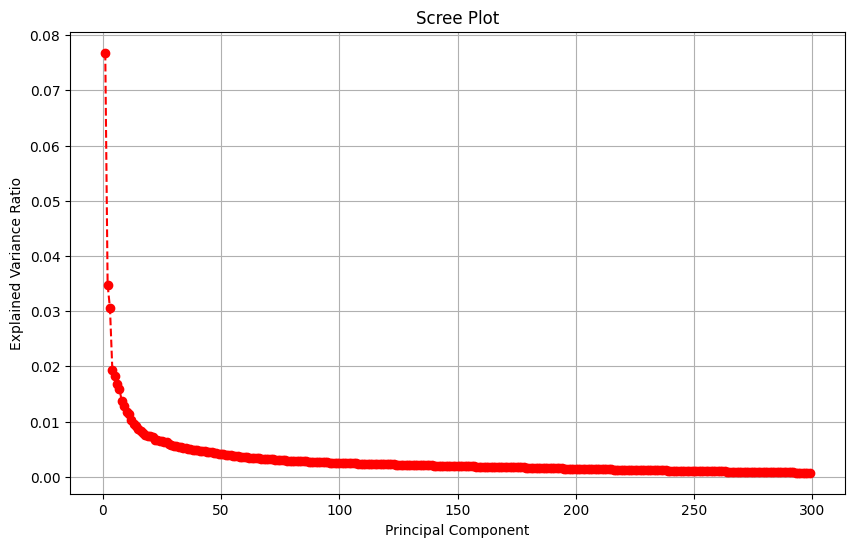

In [30]:
# applying PCA to compute the explained variance for each component
# pca = PCA()
# pca.fit(centered_data_2023)

# the scree plot (explained variance vs. number of components)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
### Based on the scree plot elbow it suggest to use 30 to componennts

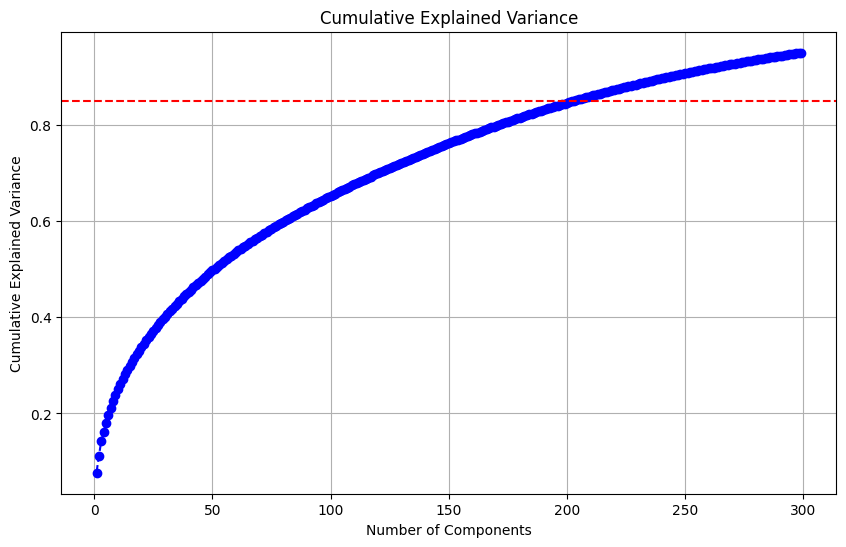

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='blue')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% threshold')
plt.grid(True)
plt.show()

# num_components_95 = np.argmax(cumulative_variance >= 0.85) + 1
# print(f"Components needed for 85% variance: {num_components_95}")

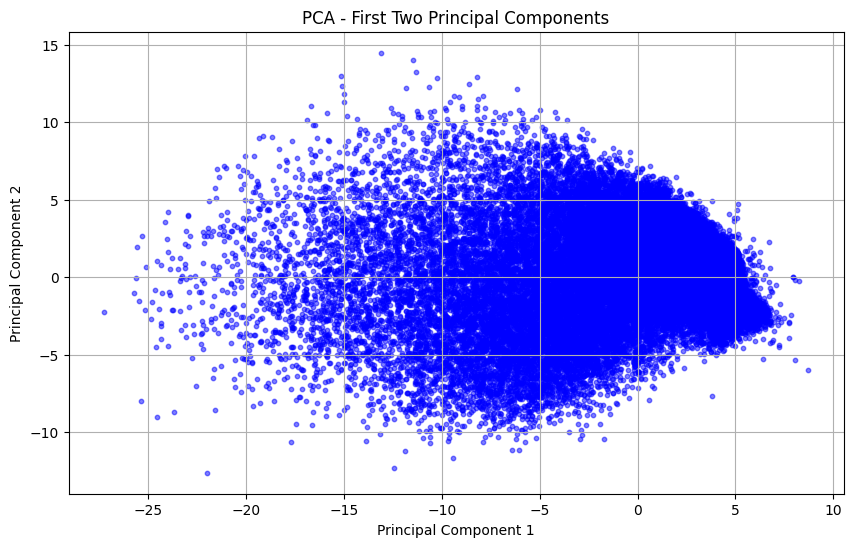

In [32]:
# apply PCA with the selected number of components
pca = PCA(n_components=40)
pca_result = pca.fit_transform(centered_data_2023)

# visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 3], alpha=0.5, s=10, color='blue')
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Clustering- With PCA

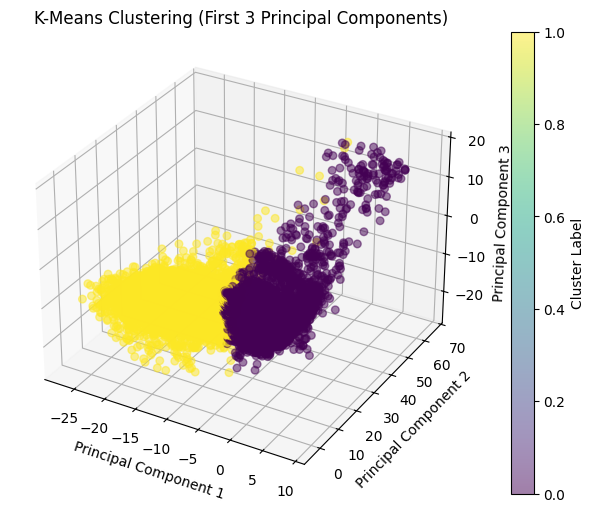

Silhouette Score for 2 clusters: 0.507095938491163


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 2 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(pca_result[:, :40])  # Using the first 3 PCs for clustering
labels = kmeans.labels_

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=labels, cmap='viridis', s=30, alpha=0.5)

plt.title('K-Means Clustering (First 3 Principal Components)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

silhouette_avg = silhouette_score(pca_result[:, :3], labels)
print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg}')

In [218]:
a = []
b = []
for i in labels.tolist():
    if i==0:
        a.append(i)
    else:
         b.append(i)
print(len(a))
print(len(b))

37625
12908


In [219]:
# adding the cluster label to the original data
dataset_2023_2023_indexed = dataset_2023_remv_low_var.loc[centered_data_2023.index] 
dataset_2023_2023_indexed

,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,EDUHIGHCAT,EDUSCHLGO,ENRLCOLLFT2,IRHHSIZ2,IRKI17_2,IRHH65_2,HLCNOTYR,IRMEDICR,IRMCDCHP,IRCHMPUS,HLCALLFG,OTHINS,IRFAMSOC,IIFAMSOC,IRFAMSSI,IRFSTAMP,IRFAMPMT,IRFAMSVC,IIWELMOS,IRPINC3,IIPINC3,IRFAMIN3,IIFAMIN3,BOOKED,DRVINALCO,DRVINMARJ,DRVINCOCN,DRVINHERN,DRVINHALL,DRVININHL,DRVINMETH,CIGEVER,CIG30USE,NICVAPEVER,NICVAPAGE,NICVAP30N,SMKLSSEVR,SMKLSSTRY,SMKLSS30N,SMKLSS30E,CIGAREVR,CIGARTRY,CGR30USE,CI30EST,PIPEVER,PIPE30DY,IRPMNICDEP,IIPMNICDEP,ALCEVER,ALCTRY,ALTOTFG,ALFQFLG,ALCDAYS,ALDYSFG,CADRKDRUG,CADRKMARJ,CABINGFLG,CBDHMPEVR,CBDHMPREC,MJEVER,MJAGE,MRTOTFG,MJFQFLG,MJDAY30A,MEDMJPA2,MKMBGHTREC,BLNTEVER,BLNTAGE,BLRECFL2,BLNT30DY,BLNTNOMJ,COCEVER,COCAGE,CCTOTFG,CCFQFLG,CCDAYPYR,CCDAYPMO,CCDAYPWK,COCUS30A,CC30EST,CRKAGE,CRKYFU,CRKMFU,CRKYRTOT,CRTOTFG,CRFQFLG,CRDAYPYR,CRDAYPMO,CRDAYPWK,CRKUS30A,CR30EST,HEREVER,HERAGE,HERYFU,HERMFU,HRTOTFG,HRDAYPYR,HRDAYPMO,HRDAYPWK,HER30USE,HR30EST,LSD,HALTOTFG,HALFQFLG,HALLDYPMO,HALLDYPWK,HALLUC30N,HALLUC30E,LSDAGE,LSDYFU,PCPAGE,PCPYFU,ECSTMOAGE,ECSTMOYFU,KETMINREC,DAMTFXREC,SALVIAREC,AMYLNIT,INHALOT1,INHALOT2,INHALOT3,INHALOT4,INHALOT5,INHALYFU,INHTOTFG,INHFQFLG,INHDYSYR,INHDYPMO,INHDYPWK,INHAL30N,INHAL30ES,METHAMEVR,METHAMAGE,METHAMYFU,METHAMMFU,METOTFG,MEFQFLG,METHDYSYR,METHDYPMO,METHDYPWK,METHAM30N,METHAM30E,OXCNANYYR,PNRANYLIF,PNRANYREC,OXCNNMYR,OXCNNMAGE,OXCNNMYFU,PNRNMREC,PNRNMINIT,PNRNMAGE,PNRNM30FQ,PNRNM30ES,PNRNM30AL,PNRRSOTRS2,PNRRSMAIN,PNRNORXFG,TRQANYLIF,TRQANYREC,TRQNMREC,TRQNMINIT,TRQNMAGE,TRQNM30FQ,TRQNM30ES,TRQNM30AL,TRQRSOTRS2,TRQRSMAIN,TRQNORXFG,STMANYLIF,STMANYREC,STMNMREC,STMNMINIT,STMNMAGE,STMNM30FQ,STMNM30ES,STMNDLREC,STMRSOTRS2,STMRSMAIN,STMNORXFG,SEDANYLIF,SEDANYREC,SEDNMREC,SEDNMINIT,SEDNMAGE,SEDNM30FQ,SEDNM30ES,SEDNM30AL,SEDRSOTRS2,SEDRSMAIN,SEDNORXFG,IICIGRC,IICGRRC,IINICVAPREC,IISMKLSSREC,IIALCRC,IIMJRC,IIHALLUCREC,IIINHALREC,IIPNRANYREC,IROXCNANYYR,IIOXCNANYYR,IIFENTANYYR,IRBZOANYYR,IIBZOANYYR,IIPNRNMREC,IITRQNMREC,IISTMNMREC,IISEDNMREC,IICRKFM,IIHERFM,IIINHAL30N,IIPNRNM30FQ,IITRQNM30FQ,IISTMNM30FQ,IIPNRNMINIT,IITRQNMINIT,IISTMNMINIT,IIPNRNMYFU,IITRQNMYFU,IISTMNMYFU,CIGYR,CGRYR,SMKLSSYR,TOBYR,TOBMON,NICVAPYR,TOBVNICYR,TOBVNICMON,TOBCIGVAP2,CBDHMPYR,CBDHMPMON,MJSMKYR,MJVAPYR,MJDABYR,MJEATYR,MJMTHYR,MJSKNYR,MJCMOTHYR,MJSMKMON,MJVAPMON,MJDABMON,MJEATMON,MJCMOTHMON,PNRANYYR,TRQANYYR,STMANYYR,SEDANYYR,PSYANYYR,PSYCHFLAG,PSYCHYR,PSYCHMON,CNSNMYR,CNSNMMON,MJONLYFLAG,MJONLYYR,ILLEMFLAG,ILLEMYR,ILLEMMON,DCIGMON,CDCGMO,CDNOCGMO,BNGDRKMON,HVYDRKMON,ILTOBALCYR,ILTOBALCMN,ALCYDAYS,MRJYDAYS,FUCIG18,FUCD218,FUCD221,FUCGR18,FUCGR21,FUSMKLSS18,FUNICVAP18,FUNICVAP21,FUALC18,FUALC21,FUMJ18,FUMJ21,FUCOC18,FUCOC21,FUCRK21,FUHALLUC18,FUHALLUC21,FULSD18,FULSD21,FUECSTMO18,FUECSTMO21,FUINHAL18,FUMETHAM18,FUMETHAM21,COLDMEDS,COLDREC,COLDYR1,COLDYR2,COLDYR3,COLDYR4,COLDYR5,OTCFLAG,GHB,GHBREC,CONDLREC,HRSMKREC,HRSNFREC,HEOTSMK,HEOTSP,HRNDLREC,METHNDLRC,OTDGNDLRC,IINPCOLDREC,UDALTIMEUSE,UDMJTIMEGET,UDMJWSHSTOP,UDCCNOTSTOP,UDCCWSHSTOP,UDCCHLTHCTD,UDCCMNTLCTD,UDCCFMLYCTD,UDCCWDTIRED,UDCCAVWCOCN,UDHETIMEGET,UDHELESSEFF,UDHENOTSTOP,UDHEWSHSTOP,UDHEHLTHCTD,UDHEMNTLPRB,UDHEMNTLCTD,UDHEFMLYCTD,UDHEAVWHERN,UDHANOTSTOP,UDHAHLTHCTD,UDHAMNTLCTD,UDHAFMLYCTD,UDINNOTSTOP,UDINHLTHCTD,UDINMNTLCTD,UDINFMLYCTD,UDMETIMEGET,UDMESTRURGE,UDMELESSEFF,UDMENOTSTOP,UDMEWSHSTOP,UDMEHLTHCTD,UDMEMNTLCTD,UDMEFMLYCTD,UDMEWDTIRED,UDMEAVWMETH,UDTRNOTSTOP,UDTRHLTHCTD,UDTRMNTLCTD,UDTRFMLYCTD,UDTRAVWSVTR,UDSTNOTSTOP,UDSTHLTHCTD,UDSTMNTLCTD,UDSTFMLYCTD,UDSTWDTIRED,UDSTAVWSTIM,UDSVNOTSTOP,UDSVHLTHCTD,UDSVMNTLCTD,UDSVFMLYCTD,UDSVAVWSVTR,IRPYUD5ALC,IRPYUD5MRJ,UD5PSYANY,UD5OPIANY,UD5CNSANY,UD5ILALANY,UD5ILAALANY,UD5ILNALANY,UD5ALNILANY,SMKAGLAST,SMKYRLAST,CGRAGLST,COCYLU,CRKYLU,HERYLU,LSDYLU,PCPYLU,PCPMLU,ECSTMOYLU,INHLYRLST,METHYRLST,SUTOUTINHL,SUTOUTHER,SUTOUTMETH,SUTOUTSED,IISUTSUPPGRP,IRSUTOUTMHCR,IRSUTOUTTHRP,IRSUTOUTDOC,IRSUTPHVID,IISUTDETOX,SUTINPPY,SUTOUTNDOC,SUTOUTDRGPY,SUTOUTUNSPPY,SUTRTPY,SUTRTDRGPY,SUTRTALCPY,SUTRTUNSPPY,RSKCIGPKD,RSKMRJMON,RSK

In [220]:
dataset_2023_2023_indexed['CLUSTER'] = labels
dataset_2023_2023_indexed

,AGE3,HEALTH,MOVSINPYR2,IRSEX,IRMARIT,IREDUHIGHST2,PREGAGE2,DRVINAGE,NEWRACE2,EDUHIGHCAT,EDUSCHLGO,ENRLCOLLFT2,IRHHSIZ2,IRKI17_2,IRHH65_2,HLCNOTYR,IRMEDICR,IRMCDCHP,IRCHMPUS,HLCALLFG,OTHINS,IRFAMSOC,IIFAMSOC,IRFAMSSI,IRFSTAMP,IRFAMPMT,IRFAMSVC,IIWELMOS,IRPINC3,IIPINC3,IRFAMIN3,IIFAMIN3,BOOKED,DRVINALCO,DRVINMARJ,DRVINCOCN,DRVINHERN,DRVINHALL,DRVININHL,DRVINMETH,CIGEVER,CIG30USE,NICVAPEVER,NICVAPAGE,NICVAP30N,SMKLSSEVR,SMKLSSTRY,SMKLSS30N,SMKLSS30E,CIGAREVR,CIGARTRY,CGR30USE,CI30EST,PIPEVER,PIPE30DY,IRPMNICDEP,IIPMNICDEP,ALCEVER,ALCTRY,ALTOTFG,ALFQFLG,ALCDAYS,ALDYSFG,CADRKDRUG,CADRKMARJ,CABINGFLG,CBDHMPEVR,CBDHMPREC,MJEVER,MJAGE,MRTOTFG,MJFQFLG,MJDAY30A,MEDMJPA2,MKMBGHTREC,BLNTEVER,BLNTAGE,BLRECFL2,BLNT30DY,BLNTNOMJ,COCEVER,COCAGE,CCTOTFG,CCFQFLG,CCDAYPYR,CCDAYPMO,CCDAYPWK,COCUS30A,CC30EST,CRKAGE,CRKYFU,CRKMFU,CRKYRTOT,CRTOTFG,CRFQFLG,CRDAYPYR,CRDAYPMO,CRDAYPWK,CRKUS30A,CR30EST,HEREVER,HERAGE,HERYFU,HERMFU,HRTOTFG,HRDAYPYR,HRDAYPMO,HRDAYPWK,HER30USE,HR30EST,LSD,HALTOTFG,HALFQFLG,HALLDYPMO,HALLDYPWK,HALLUC30N,HALLUC30E,LSDAGE,LSDYFU,PCPAGE,PCPYFU,ECSTMOAGE,ECSTMOYFU,KETMINREC,DAMTFXREC,SALVIAREC,AMYLNIT,INHALOT1,INHALOT2,INHALOT3,INHALOT4,INHALOT5,INHALYFU,INHTOTFG,INHFQFLG,INHDYSYR,INHDYPMO,INHDYPWK,INHAL30N,INHAL30ES,METHAMEVR,METHAMAGE,METHAMYFU,METHAMMFU,METOTFG,MEFQFLG,METHDYSYR,METHDYPMO,METHDYPWK,METHAM30N,METHAM30E,OXCNANYYR,PNRANYLIF,PNRANYREC,OXCNNMYR,OXCNNMAGE,OXCNNMYFU,PNRNMREC,PNRNMINIT,PNRNMAGE,PNRNM30FQ,PNRNM30ES,PNRNM30AL,PNRRSOTRS2,PNRRSMAIN,PNRNORXFG,TRQANYLIF,TRQANYREC,TRQNMREC,TRQNMINIT,TRQNMAGE,TRQNM30FQ,TRQNM30ES,TRQNM30AL,TRQRSOTRS2,TRQRSMAIN,TRQNORXFG,STMANYLIF,STMANYREC,STMNMREC,STMNMINIT,STMNMAGE,STMNM30FQ,STMNM30ES,STMNDLREC,STMRSOTRS2,STMRSMAIN,STMNORXFG,SEDANYLIF,SEDANYREC,SEDNMREC,SEDNMINIT,SEDNMAGE,SEDNM30FQ,SEDNM30ES,SEDNM30AL,SEDRSOTRS2,SEDRSMAIN,SEDNORXFG,IICIGRC,IICGRRC,IINICVAPREC,IISMKLSSREC,IIALCRC,IIMJRC,IIHALLUCREC,IIINHALREC,IIPNRANYREC,IROXCNANYYR,IIOXCNANYYR,IIFENTANYYR,IRBZOANYYR,IIBZOANYYR,IIPNRNMREC,IITRQNMREC,IISTMNMREC,IISEDNMREC,IICRKFM,IIHERFM,IIINHAL30N,IIPNRNM30FQ,IITRQNM30FQ,IISTMNM30FQ,IIPNRNMINIT,IITRQNMINIT,IISTMNMINIT,IIPNRNMYFU,IITRQNMYFU,IISTMNMYFU,CIGYR,CGRYR,SMKLSSYR,TOBYR,TOBMON,NICVAPYR,TOBVNICYR,TOBVNICMON,TOBCIGVAP2,CBDHMPYR,CBDHMPMON,MJSMKYR,MJVAPYR,MJDABYR,MJEATYR,MJMTHYR,MJSKNYR,MJCMOTHYR,MJSMKMON,MJVAPMON,MJDABMON,MJEATMON,MJCMOTHMON,PNRANYYR,TRQANYYR,STMANYYR,SEDANYYR,PSYANYYR,PSYCHFLAG,PSYCHYR,PSYCHMON,CNSNMYR,CNSNMMON,MJONLYFLAG,MJONLYYR,ILLEMFLAG,ILLEMYR,ILLEMMON,DCIGMON,CDCGMO,CDNOCGMO,BNGDRKMON,HVYDRKMON,ILTOBALCYR,ILTOBALCMN,ALCYDAYS,MRJYDAYS,FUCIG18,FUCD218,FUCD221,FUCGR18,FUCGR21,FUSMKLSS18,FUNICVAP18,FUNICVAP21,FUALC18,FUALC21,FUMJ18,FUMJ21,FUCOC18,FUCOC21,FUCRK21,FUHALLUC18,FUHALLUC21,FULSD18,FULSD21,FUECSTMO18,FUECSTMO21,FUINHAL18,FUMETHAM18,FUMETHAM21,COLDMEDS,COLDREC,COLDYR1,COLDYR2,COLDYR3,COLDYR4,COLDYR5,OTCFLAG,GHB,GHBREC,CONDLREC,HRSMKREC,HRSNFREC,HEOTSMK,HEOTSP,HRNDLREC,METHNDLRC,OTDGNDLRC,IINPCOLDREC,UDALTIMEUSE,UDMJTIMEGET,UDMJWSHSTOP,UDCCNOTSTOP,UDCCWSHSTOP,UDCCHLTHCTD,UDCCMNTLCTD,UDCCFMLYCTD,UDCCWDTIRED,UDCCAVWCOCN,UDHETIMEGET,UDHELESSEFF,UDHENOTSTOP,UDHEWSHSTOP,UDHEHLTHCTD,UDHEMNTLPRB,UDHEMNTLCTD,UDHEFMLYCTD,UDHEAVWHERN,UDHANOTSTOP,UDHAHLTHCTD,UDHAMNTLCTD,UDHAFMLYCTD,UDINNOTSTOP,UDINHLTHCTD,UDINMNTLCTD,UDINFMLYCTD,UDMETIMEGET,UDMESTRURGE,UDMELESSEFF,UDMENOTSTOP,UDMEWSHSTOP,UDMEHLTHCTD,UDMEMNTLCTD,UDMEFMLYCTD,UDMEWDTIRED,UDMEAVWMETH,UDTRNOTSTOP,UDTRHLTHCTD,UDTRMNTLCTD,UDTRFMLYCTD,UDTRAVWSVTR,UDSTNOTSTOP,UDSTHLTHCTD,UDSTMNTLCTD,UDSTFMLYCTD,UDSTWDTIRED,UDSTAVWSTIM,UDSVNOTSTOP,UDSVHLTHCTD,UDSVMNTLCTD,UDSVFMLYCTD,UDSVAVWSVTR,IRPYUD5ALC,IRPYUD5MRJ,UD5PSYANY,UD5OPIANY,UD5CNSANY,UD5ILALANY,UD5ILAALANY,UD5ILNALANY,UD5ALNILANY,SMKAGLAST,SMKYRLAST,CGRAGLST,COCYLU,CRKYLU,HERYLU,LSDYLU,PCPYLU,PCPMLU,ECSTMOYLU,INHLYRLST,METHYRLST,SUTOUTINHL,SUTOUTHER,SUTOUTMETH,SUTOUTSED,IISUTSUPPGRP,IRSUTOUTMHCR,IRSUTOUTTHRP,IRSUTOUTDOC,IRSUTPHVID,IISUTDETOX,SUTINPPY,SUTOUTNDOC,SUTOUTDRGPY,SUTOUTUNSPPY,SUTRTPY,SUTRTDRGPY,SUTRTALCPY,SUTRTUNSPPY,RSKCIGPKD,RSKMRJMON,RSK

In [221]:
dataset_2023_2023_indexed.to_csv('dataseeet_2023_with_cluster_label_second.csv', index=False)